# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv("cost_revenue_dirty.csv")

### Quick Overview

In [3]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
df.shape

(5391, 6)

In [6]:
df.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [9]:
df.duplicated().sum()

0

## Convert Columns to Numeric Type

In [10]:
chars_to_remove = [",", "$"]
columns_to_convert = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]

In [13]:
for col in columns_to_convert:
    for char in chars_to_remove:
        df[col] = df[col].astype(str).str.replace(char, "")
    df[col] = pd.to_numeric(df[col])

In [14]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


### Convert date column to datetime object

In [16]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [19]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [22]:
#Descriptive Statistics

In [23]:
df.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


In [24]:
# The lowest budget movie
df[df.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [25]:
# The highest budget film
df[df.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [26]:
zero_domestic = df[df.USD_Domestic_Gross == 0]

In [27]:
len(zero_domestic)

512

In [28]:
zero_domestic.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [29]:
zero_worldwide = df[df.USD_Worldwide_Gross == 0]

In [30]:
len(zero_worldwide)

357

In [31]:
zero_worldwide.sort_values("USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [32]:
df[(df.USD_Worldwide_Gross != 0) & (df.USD_Domestic_Gross == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


## Dropping movies that were not released by the time of data compilation

In [33]:
drop_dates = pd.Timestamp("2018-5-1")

In [34]:
future_release = df[df["Release_Date"] >= drop_dates]

In [35]:
future_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [38]:
df_clean = df.drop(future_release.index)

In [40]:
len(df_clean[df_clean.USD_Production_Budget > df_clean.USD_Worldwide_Gross]) / len(df_clean) * 100

37.27711738484398

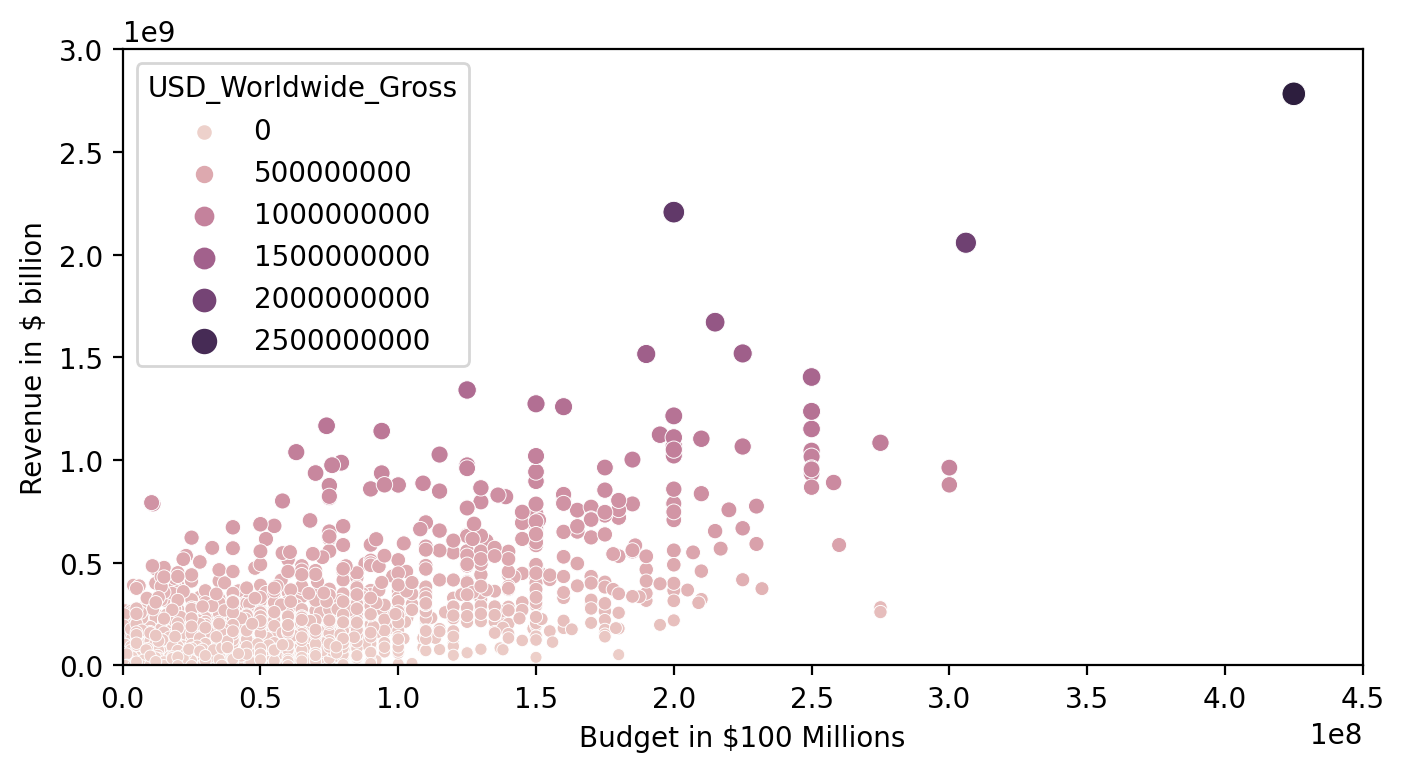

In [51]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(df_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross", 
                hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
plt.ylabel("Revenue in $ billion")
plt.xlabel("Budget in $100 Millions")
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000);

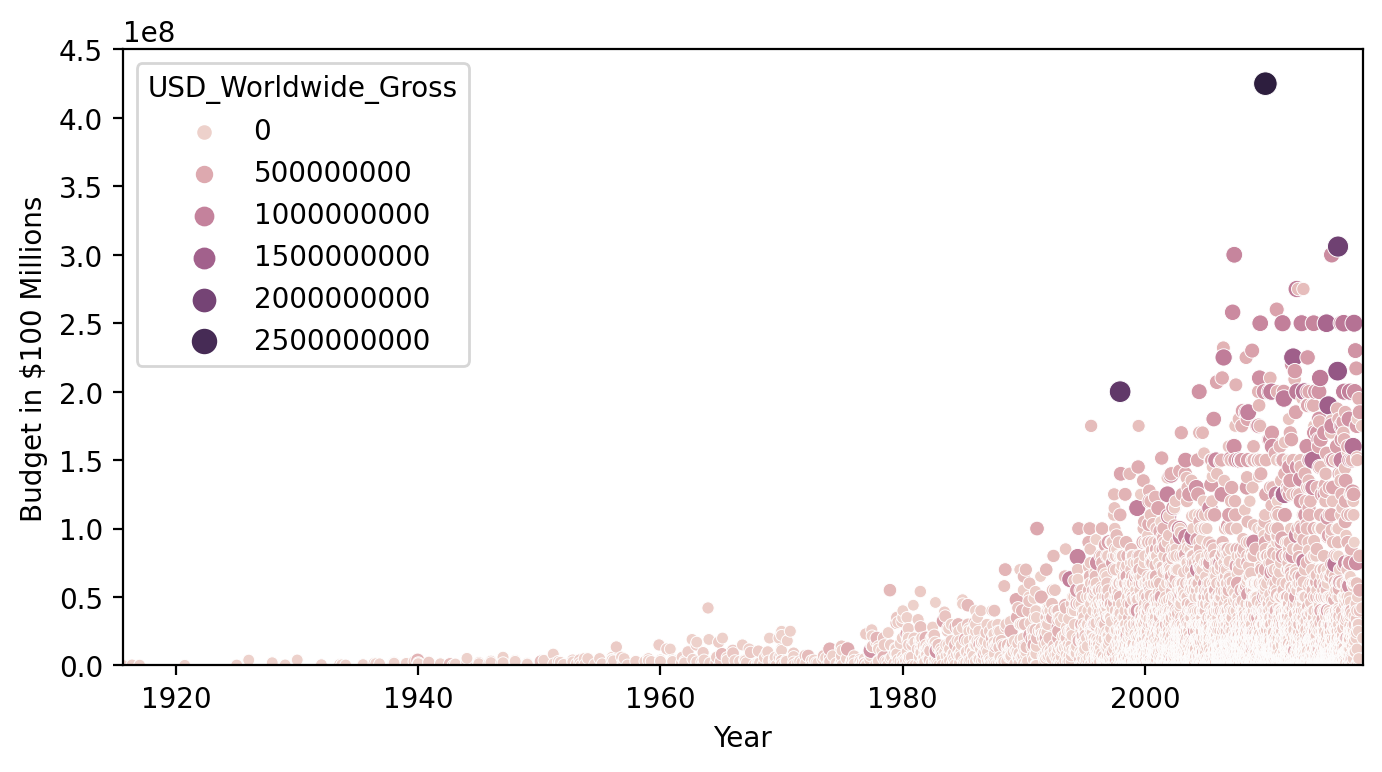

In [52]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(df_clean, x="Release_Date", y="USD_Production_Budget", 
                hue="USD_Worldwide_Gross", size="USD_Worldwide_Gross")
plt.ylabel("Budget in $100 Millions")
plt.xlabel("Year")
plt.ylim(0, 450000000)
plt.xlim(df_clean.Release_Date.min(), df_clean.Release_Date.max());

In [54]:
dt_index = pd.DatetimeIndex(df_clean.Release_Date)

In [55]:
year = dt_index.year

In [56]:
year

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [57]:
decades = year // 10 * 10

In [58]:
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)

In [59]:
df_clean["Decade"] = decades

In [60]:
old_films = df_clean[df_clean.Decade <= 1960]
new_films = df_clean[df_clean.Decade > 1960]

In [61]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,153,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,1954-06-10 04:04:42.352941184,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
min,1253.000000,1915-08-02 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1946-01-01 00:00:00,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,1956-12-23 00:00:00,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,1964-10-22 00:00:00,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,1969-12-19 00:00:00,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000
std,742.137130,NaN,5.713649e+06,5.493183e+07,3.264175e+07,12.719014


In [62]:
old_films.sort_values("USD_Production_Budget", ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
110,2552,1964-01-01,The Fall of the Roman Empire,19000000,4750000,4750000,1960
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000,1960
114,2670,1964-10-22,My Fair Lady,17000000,72070955,72000000,1960
102,2698,1963-01-01,55 Days at Peking,17000000,10000000,10000000,1960
125,2831,1966-10-10,Hawaii,15000000,34562222,34562222,1960


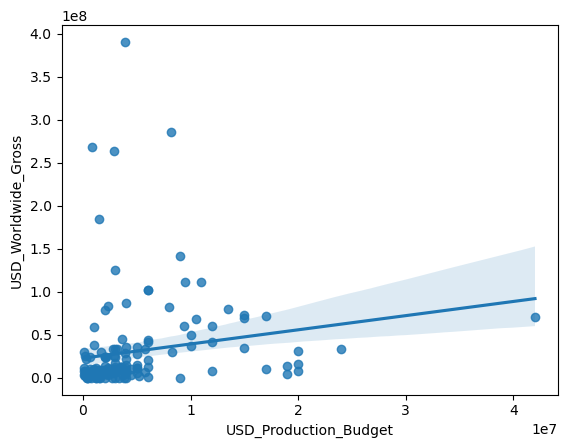

In [63]:
sns.regplot(old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross");

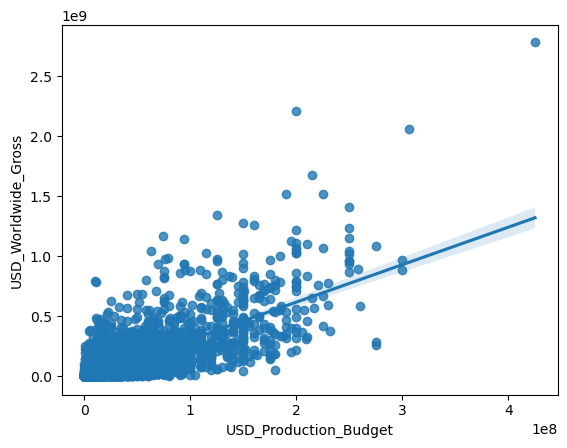

In [64]:
sns.regplot(new_films, x="USD_Production_Budget", y="USD_Worldwide_Gross");

In [65]:
new_films.sort_values("USD_Production_Budget", ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,2010
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,2010
4223,7,2012-09-03,John Carter,275000000,282778100,73058679,2010
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099,2010
3777,8,2010-11-24,Tangled,260000000,586581936,200821936,2010
2885,9,2007-04-05,Spider-Man 3,258000000,890875303,336530303,2000
5161,12,2016-03-25,Batman v Superman: Dawn of Justice,250000000,868160194,330360194,2010


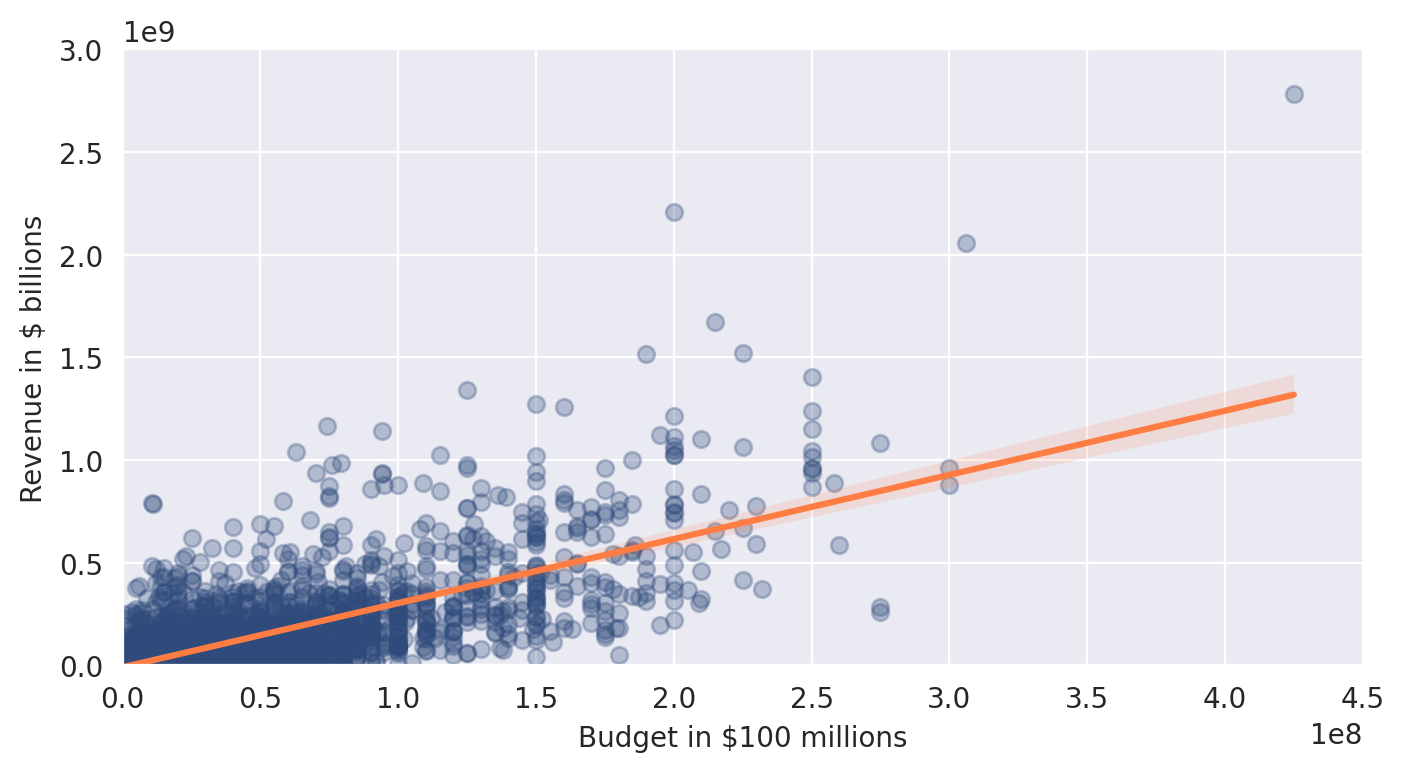

In [67]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(new_films,
                     x="USD_Production_Budget",
                     y="USD_Worldwide_Gross",
                     color="#2f4b7c",
                     scatter_kws = {"alpha": 0.3},
                     line_kws = {"color": "#ff7c43"}
    )
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel="Revenue in $ billions",
           xlabel="Budget in $100 millions"
    )

In [68]:
from sklearn.linear_model import LinearRegression

In [76]:
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [70]:
regression = LinearRegression()

In [77]:
regression.fit(X, y)

LinearRegression()

In [78]:
regression.intercept_

array([-8650768.00661024])

In [79]:
regression.coef_

array([[3.12259592]])

In [80]:
regression.score(X, y)

0.5577032617720403

In [81]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression.fit(X,y)

LinearRegression()

In [82]:
regression.coef_

array([[1.64771314]])

In [83]:
regression.intercept_

array([22821538.63508038])

In [84]:
regression.score(X,y)

0.02937258620576877